# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [1]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
a_last3 = a[-3:]
print(a_last3)

# reverse the list
a_last3.reverse()
print(a_last3)

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
a_squared = [i**2 for i in a]
print(a_squared)

[4, 5, 6]
[6, 5, 4]
[1, 4, 9, 16, 25, 36]


In [2]:
import numpy as np
# create a numpy array from this list
b = np.array(a_squared) # change this
b

array([ 1,  4,  9, 16, 25, 36])

In [3]:
# find the mean of b
b_mean = np.mean(b)
b_mean

15.166666666666666

In [4]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
b_square = np.square(b)
b_square

array([   1,   16,   81,  256,  625, 1296])

In [5]:
# change b from a length-6 list to a 2x3 matrix
b2d = np.reshape(b, [2,3])
b2d

array([[ 1,  4,  9],
       [16, 25, 36]])

In [6]:
# find the mean value of each row
b2d_mean_row = np.mean(b2d, axis=1)
b2d_mean_row

array([ 4.66666667, 25.66666667])

In [7]:
# find the mean value of each column
b2d_mean_col = np.mean(b2d, axis=0)
b2d_mean_col

array([ 8.5, 14.5, 22.5])

In [8]:
# find the third column of b
third_col = b2d[:, 2]
third_col

array([ 9, 36])

In [9]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd

starbucks_clean = pd.read_csv('../data/starbucks_clean.csv')

In [10]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
calories_mean = starbucks_clean['calories'].mean()
calories_mean

201.0772727272727

In [11]:
# how many different categories of beverages are there?
bev_cat = len(starbucks_clean['beverage'].unique())
bev_cat

30

In [12]:
# what is the average # calories for each beverage category?
avg_cal_based_on_bev_cat = starbucks_clean.groupby('beverage_category').mean().loc[:, 'calories']
avg_cal_based_on_bev_cat

beverage_category
classic espresso drinks             140.172414
coffee                                4.250000
frappuccino blended coffee          276.944444
frappuccino blended crme            233.076923
frappuccino light blended coffee    162.500000
shaken iced beverages               110.769231
signature espresso drinks           250.000000
smoothies                           282.500000
tazo tea drinks                     206.666667
Name: calories, dtype: float64

In [13]:
# what beverage preparation includes the most sugar on average?
bev_prep_most_sugar_avg = starbucks_clean.groupby('beverage_prep').mean().loc[:, 'sugars']
bev_prep_most_sugar_avg[bev_prep_most_sugar_avg == max(bev_prep_most_sugar_avg)].index[0]

'Whole Milk'

In [14]:
# what is the average % daily value calcium content for each beverage?
avg_calc_per_bev = starbucks_clean.groupby('beverage').mean().loc[:, 'calcium']
avg_calc_per_bev

beverage
banana chocolate smoothie                      20.000000
brewed coffee                                   0.500000
caff americano                                  1.500000
caff latte                                     35.000000
caff mocha without whipped cream               30.000000
cappuccino                                     22.500000
caramel                                        11.000000
caramel apple spice without whipped cream       0.000000
caramel macchiato                              28.333333
caramel without whipped cream                  12.000000
coffee                                         12.333333
espresso                                        0.000000
hot chocolate without whipped cream            35.000000
iced brewed coffee with classic syrup           0.000000
iced brewed coffee with milk  classic syrup     8.000000
java chip                                      11.666667
java chip without whipped cream                12.555556
mocha                 

In [15]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay

clories_median = starbucks_clean['calories'].median()
protein_median = starbucks_clean['protein'].median()
which_drink = starbucks_clean.loc[:, ['beverage', 'beverage_prep', 'protein', 'calories']]
samples = which_drink[(which_drink['calories'] < clories_median) & (which_drink['protein'] > protein_median)]
best_drink = samples.loc[samples['protein'].idxmax()]
best_drink['beverage'] + " " + best_drink['beverage_prep']

'caff latte Venti Nonfat Milk'

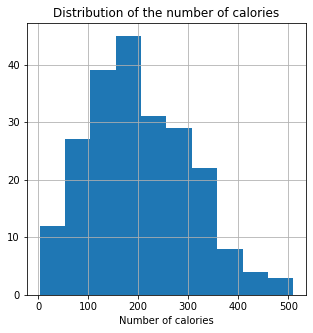

In [16]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

starbucks_clean['calories'].hist(figsize=(5,5));
plt.xlabel('Number of calories')
plt.title('Distribution of the number of calories')
plt.show()

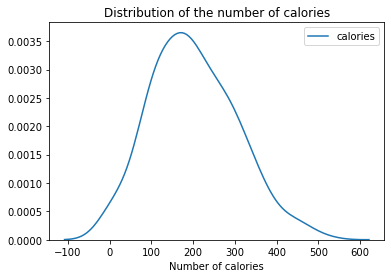

In [17]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns

sns.kdeplot(starbucks_clean['calories'])
plt.xlabel('Number of calories')
plt.title("Distribution of the number of calories")
plt.show()

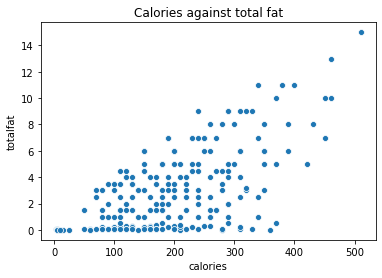

In [18]:
# plot calories against total fat using seaborn
sns.scatterplot(starbucks_clean['calories'], starbucks_clean['totalfat'])
plt.title('Calories against total fat')
plt.show()

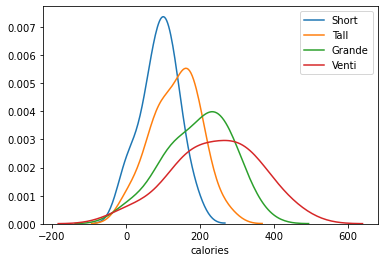

In [19]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.

short = starbucks_clean[(starbucks_clean['beverage_prep']=='Short') | (starbucks_clean['beverage_prep']=='Short Nonfat Milk')].loc[:, 'calories']
tall = starbucks_clean[(starbucks_clean['beverage_prep']=='Tall') | (starbucks_clean['beverage_prep']=='Tall Nonfat Milk')].loc[:, 'calories']
grande = starbucks_clean[(starbucks_clean['beverage_prep']=='Grande') | (starbucks_clean['beverage_prep']=='Grande Nonfat Milk')].loc[:, 'calories']
venti = starbucks_clean[(starbucks_clean['beverage_prep']=='Venti') | (starbucks_clean['beverage_prep']=='Venti Nonfat Milk')].loc[:, 'calories']

sns.distplot(short, hist=False, label='Short')
sns.distplot(tall, hist=False, label='Tall')
sns.distplot(grande, hist=False, label='Grande')
sns.distplot(venti, hist=False, label='Venti')
plt.show()